In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sber_data = pd.read_csv('data/sber_data.csv')
cols_null_percent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


МЕТОД РУЧНОГО ПОИСКА И ЗДРАВОГО СМЫСЛА

describe(). Рассчитаем статистические показатели для признака жилой площади (life_sq).

In [2]:
sber_data['life_sq'].describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

min = 0 - квартиры с нулевой площадью
max = 7478, а 75 квантиль = 43

In [4]:
display(sber_data[sber_data['life_sq'] == 0].shape[0])

45

Это могут быть апартаменты — вид коммерческой недвижимости, которая юридически не является жилой площадью, но законно продаётся по ценам, сопоставимым с квартирными. Оставим их в покое.     

In [5]:
display(sber_data[sber_data['life_sq'] > 7000])

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
13546,13549,79,7478.0,8.0,Poselenie Voskresenskoe,NaN,0,NaN,0,0,...,5.072389,1.210613,0.826052,1.582378,0.756119,21.472421,14.917332,no data,0,7705000


Выброс налицо: гигантская жилая площадь (life_sq), да ещё почти в 100 раз превышает общую площадь (full_sq).

найдём квартиры у которых жил. площадь больше суммарной.

In [6]:
outliers = sber_data[sber_data['life_sq'] > sber_data['full_sq']]
print(outliers.shape[0])

37


Таких квартир оказывается 37 штук. Подобные наблюдения уже не поддаются здравому смыслу — они являются ошибочными, и от них стоит избавиться. Для этого можно воспользоваться методом drop() и удалить записи по их индексам:

In [7]:
cleaned = sber_data.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {cleaned.shape[0]}')

Результирующее число записей: 30434


In [8]:
display(sber_data['floor'].describe())

count    30304.000000
mean         7.670803
std          5.319989
min          0.000000
25%          3.000000
50%          6.500000
75%         11.000000
max         77.000000
Name: floor, dtype: float64

In [9]:
display(sber_data[sber_data['floor']> 50])

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
23584,23587,57,33.0,77.0,Lomonosovskoe,3091.0,5,8359.0,7,1,...,0.310557,0.731683,0.489763,0.86354,0.863266,2.920671,2.757058,satisfactory,0,13700000


Всего одна квартира в Ломоносовском районе. Пора идти в интернет в поиске самых высоких зданий в Москве! 

Убеждаемся в том, что здания выше 70 этажей находятся на территории комплекса Москва-Сити (Пресненский район). В Ломоносовском районе таких жилых высоток нет. Получается, что данное наблюдение — выброс.

Вы наверняка обратили внимание на сложность ручного поиска. Мы заранее знали про апартаменты и о том, что не бывает квартир с жилой площадью, которая превышает общую. Кроме того, мы «нагуглили» информацию о московских высотках. Однако бывают данные, где необходимо углубиться в предметную область, чтобы понять, что наблюдения являются «сверхъестественными».

МЕТОД МЕЖКВАРТИЛЬНОГО РАЗМАХА (МЕТОД ТЬЮКИ)

Отличным помощником в поиске потенциальных выбросов является визуализация. Если признак является числовым, то можно построить гистограмму или коробчатую диаграмму, чтобы найти аномалии.

Text(0.5, 1.0, 'Full Square Boxplot')

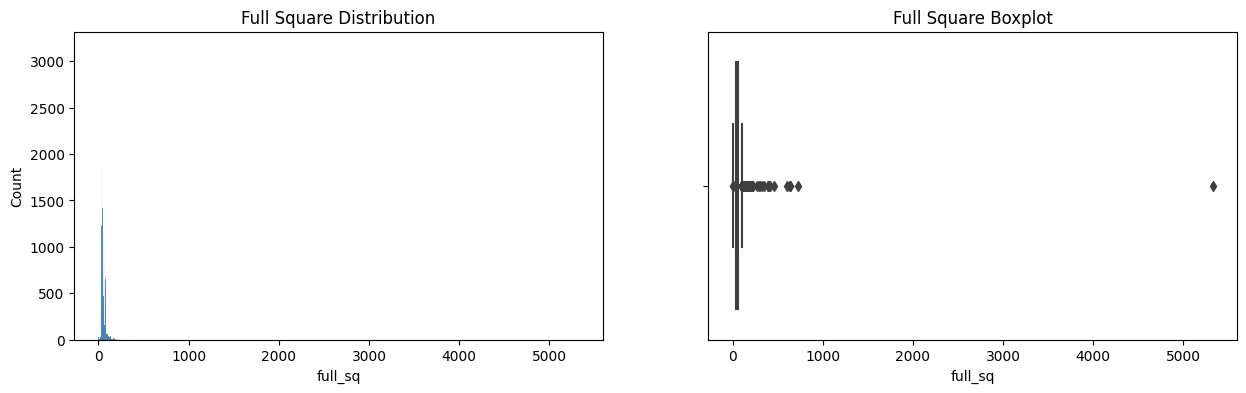

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=sber_data, x='full_sq', ax=axes[0])
histplot.set_title('Full Square Distribution')
boxplot = sns.boxplot(data=sber_data, x='full_sq', ax=axes[1])
boxplot.set_title('Full Square Boxplot')

Основная масса квартир имеет общую площадь менее 250 квадратных метров, и лишь несколько невзрачных наблюдений выбиваются из этого интервала. Максимальная площадь, судя по гистограмме, превышает 5 000 квадратных метров.

Визуализация помогает определить наличие выбросов. Для того чтобы их найти, можно воспользоваться статистическими подходами. 

Одним из таких подходов является метод межквартильного размаха (его еще называют методом Тьюки), который используется для построения коробчатой диаграммы.

Алгоритм метода:

→ вычислить 25-ый и 75-ый квантили (первый и третий квартили) — Q25 и Q75 для признака, который мы исследуем;

→ вычислить межквартильное расстояние: IQR = Q75-Q25 ;

→ вычислить верхнюю и нижнюю границы Тьюки: 
    bound(lower) = Q25-1,5*IQR
    bound(upper) = Q75+1,5*IQR

→ найти наблюдения, которые выходят за пределы границ.

В соответствии с этим алгоритмом напишем функцию outliers_iqr(), которая вам может ещё не раз пригодиться в реальных задачах. Эта функция принимает на вход DataFrame и признак, по которому ищутся выбросы, а затем возвращает потенциальные выбросы, найденные с помощью метода Тьюки, и очищенный от них датасет.

Квантили вычисляются с помощью метода quantile(). Потенциальные выбросы определяются при помощи фильтрации данных по условию выхода за пределы верхней или нижней границы.

In [12]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [13]:
outliers, cleaned = outliers_iqr(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 963
Результирующее число записей: 29508


Согласно классическому методу Тьюки, под выбросы у нас попали 963 записи в таблице. Давайте построим гистограмму и коробчатую диаграмму на новых данных cleaned_sber_data:

Text(0.5, 1.0, 'Cleaned Full Square Boxplot')

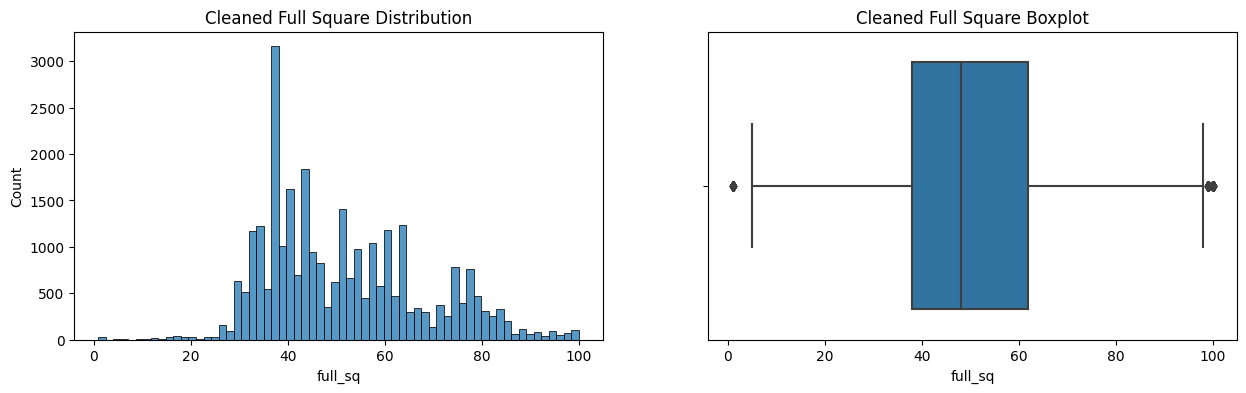

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0])
histplot.set_title('Cleaned Full Square Distribution')
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1])
boxplot.set_title('Cleaned Full Square Boxplot')

Выбросы остались, площадь урезалась до 100.
Выбросы - норма, они расчитались заново.

Классический метод межквартильного размаха не учитывает особенностей распределения! Он требует, чтобы данные были распределены плюс-минус нормально (гистограмма должна быть похожа на колокол) и требует от распределения примерной симметричности (чтобы у гистограммы были одинаковые хвосты в обе стороны).

У нас же распределение (даже после отсечения выбросов) отличается от заявленных критериев. Оно несимметрично: правый хвост изначального распределения гораздо длиннее левого (для Москвы вполне естественны квартиры с площадью свыше 100 квадратных метров) и вовсе не колоколообразно. Попросту говоря, выбор метода поиска не оправдал себя.

Никто не говорил, что вы должны должны ограничиваться только 1.5 межквартильных размахов. Вы можете сами подбирать число размахов влево и/или вправо и таким образом отбирать выбросы, учитывая особенности ваших данных. 

6.1 Давайте немного модифицируем функцию outliers_iqr(data, feature). Добавьте в неё параметры left и right, которые задают число IQR влево и вправо от границ ящика (пусть по умолчанию они равны 1.5). Функция, как и раньше, должна возвращать потенциальные выбросы и очищенный DataFrame.

Назовите измененную функцию: outliers_iqr_mod`

Можете протестировать работу функции на DataFrame test_sber_data.csv.

In [16]:
full_sq
0           43
1           34
2           43
3           89
4           77
...        ...
30466       44
30467       86
30468       45
30469       64
30470       43

[30471 rows x 1 columns]


SyntaxError: invalid syntax (399723610.py, line 2)

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('test_data.csv')

def outliers_iqr_mod(data, feature, left = 1.5, right = 1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

6.2 Давайте ослабим границы метода Тьюки справа и усилим их влево. Примените модифицированную функцию outliers_iqr_mod() к признаку full_sq из таблицы sber_data данным с параметрами left=1 и right=6. Результаты работы поместите в переменные outliers и cleaned. Чему равно результирующее число выбросов в данных?

In [19]:
def outliers_iqr_mod(data, feature, left = 1, right = 6):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

#ответ 59, что за 59?

Число выбросов по методу Тьюки: 963
Результирующее число записей: 29508


Text(0.5, 1.0, 'Cleaned Full Square Boxplot')

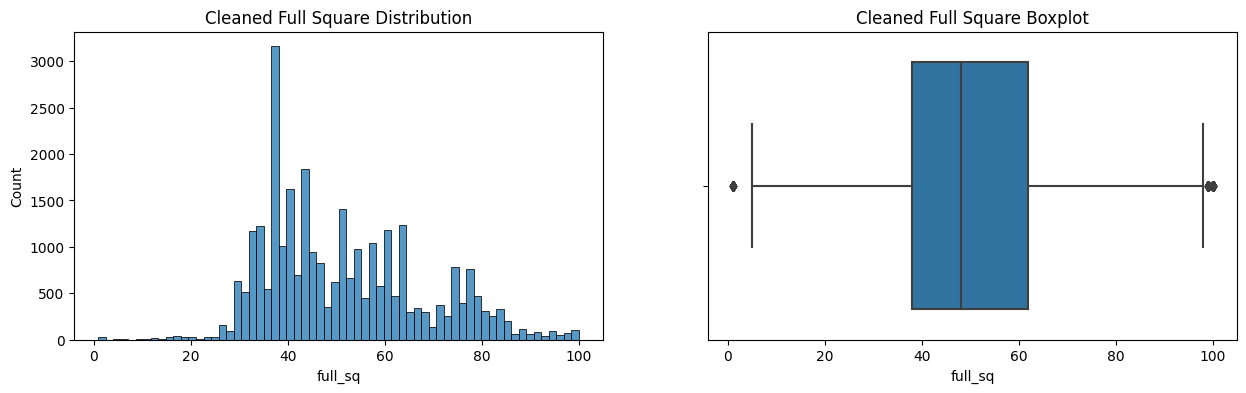

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0])
histplot.set_title('Cleaned Full Square Distribution')
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1])
boxplot.set_title('Cleaned Full Square Boxplot')

Графики не совпадают с графиками из материала курса !? Имеют меньше выбросов

МЕТОД Z-ОТКЛОНЕНИЙ (МЕТОД СИГМ)

Последний метод, который мы рассмотрим, — это метод, основанный на правиле трёх сигм для нормального распределения. 

Правило трёх сигм гласит: если распределение данных является нормальным, то 99,73 % лежат в интервале от(μ - 3σ, μ + 3σ) , где μ (мю) — математическое ожидание (для выборки это среднее значение), а σ (сигма) — стандартное отклонение. Наблюдения, которые лежат за пределами этого интервала, будут считаться выбросами.